<a href="https://colab.research.google.com/github/J0R-3L-4L/Tarea-3/blob/main/Copia_de_Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/AsCiDEN/Tarea-3/blob/main/Tarea3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 3: Ajuste de modelos**

El objetivo de esta tarea es ajustar diferentes modelos a las curvas de rotación de galaxias y, evaluando con las métricas presentadas en clases, concluír que la materia oscura es capaz de explicar la fenomenología descrita por las observaciones.

## **¿Materia oscura o solo materia luminosa?**

La curva de rotación de una galaxia es la velocidad a la cual sus estrellas o gas rota en torno a su centro como función de la distancia. Asumiendo movimiento circular y la ley de Gravitación de Newton, se puede obtener la siguiente fórmula para la curva de rotación (o ecuación de movimiento):

\begin{equation}
\tag{1}
a_c(R) = \frac{v^2(R)}{R} = \frac{G M(r\leq R)}{R^2} \implies v(R) = \sqrt{\frac{GM(r\leq R)}{R}},
\end{equation}

donde  $G$ es la constante de gravitación universal, y
\begin{equation}
\tag{2}
M(R) = M(r\leq R)= 4\pi \int_{0}^R \rho(r)r^2 dr,
\end{equation}
es decir, es la masa encerrada en una esfera de radio $R$ para una densidad de masa volumétrica $\rho(r)$.

Bajo esta ecuación, si conocemos la curva de rotación $v(R)$ de una galaxia, podemos inferir su distribución de masa y vice versa.

Una forma de obtener $M(R)$ es asumiendo que la masa de las galaxias está dominada por su componente estelar, y por ende, que existe una relación de proporcionalidad entre perfil de masa galáctico y el perfil luminoso de cada galaxia, esto ha llevado a proponer perfiles de tipo exponenciales (o de Sérsic) de la forma:

\begin{equation}
\tag{3}
M_{star}(R, M_1, R_1) = M_1 \times \left[1 - \frac{\exp(-R/R_1)(R_1 + R)}{R_1} \right]
\end{equation}

Note que este perfil depende de dos parámetros que caracterizan la masa ($M_1$) y el tamaño típico ($R_1$) de la galaxia de estudio.

**P1)**
1.   Para esta parte de la tarea será necesario trabajar con unidades, en particular, para distancias galácticas la unidad más típica es el kilo-parsec. Defina que es un kilo-parsec (kpc) y muestre su equivalencia en metros. ¿Cuántos planeta Tierra puede colocar uno al lado del otro dentro de 1 kpc de distancia?

**Respuesta:** Un kilo-parsec (kpc) es una unidad de medida utilizada en astronomía para expresar distancias en las galaxias. Un parsec (pc) es aproximadamente 3.086 × 10^16 metros, por lo que 1 kilo-parsec equivale a 3.086*10^19 metros. El diametro de la tierra corresponde a 12,742 (m) por lo que el numero de planetas tierra que pudieroamos colocar en un kiloparsec corresponde a 3.086*10^19 (m)/12,742,000 (m) = 2.42 * 10^12.
2. Grafique la curva de velocidad $v(R)$ para la distribución de masa dada en la ecuación (3). Para ello considere $M_1 = 10^{10} M_{\odot}$ y $R_1 = 5 $ kpc, donde $M_\odot \approx 1.989\times 10^{30}$ kg es la masa del sol.

**Nota:** Para esta tarea puede utilizar el módulo [astropy.units](https://docs.astropy.org/en/stable/units/) para lidiar fácilmente con las unidades. Esto es completamente opcional, no se asignará puntaje extra si es que lo hacen, pero puede investigarlo si así lo desea. Tampoco se descontará en caso contrario.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
G = 6.67e-11 # constante de gravitación universal en unidades de m^3 kg^-1 s^-2
kpc_to_m = 3.086e19 # rellene con el valor de 1 kpc en metros
solar_masses_to_kg = 1.989e30 # 1 masa solar en kg
M1=10e10*solar_masses_to_kg
R1=5*kpc_to_m

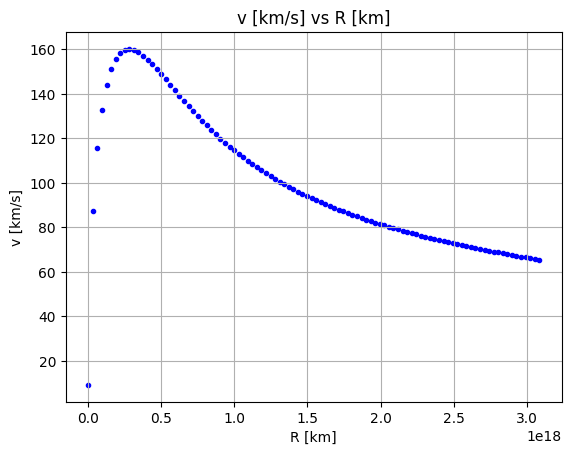

In [2]:
# Cree la función M_star(R, M_1, R_1) según la ecuación (3)

def M_star(R, M_1, R_1):
  m=M_1*(1-(np.exp(-R/R_1))*(R_1+R)/R_1)
  return(m)
# Cree la función v_R_stars(R, M1, R1) utilizando la ec. (3) en (1). v(R) debe tener unidades de km/s
# Tenga cuidado con las unidades, como referencia la velocidad debería quedar entre ~10-50 km/s
def v_R_stars(R, M1, R1):
  v=np.sqrt(G*M_star(R,M1,R1)/R)
  return(v*0.001)

# Cree el arreglo "R", con distancias desde 0.01 a 100 kpc de forma equiespaciada con 100 elementos.
R = np.linspace(0.01*kpc_to_m,100*kpc_to_m,100)

# Calcule v(R) en km/s colocando la ecuación (3) en (1) y haga el gráfico correspondiente
vr_stars = []
for i in R:
  vr_stars.append(v_R_stars(i,M1,R1))

# Haga el gráfico :)
R2 = [i * 0.001 for i in R]
plt.scatter(x=R2,y=vr_stars, marker='.',c="blue")
#plt.xlim(-1,0.8)
#plt.ylim(-2,0)
plt.xlabel("R [km]")
plt.ylabel("v [km/s]")
plt.title("v [km/s] vs R [km]")
plt.grid()
plt.show()
# No olvide en cada eje indicar las unidades.


3. ¿Qué puede decir del comportamiento de $v(R)$ para $R \gg R_1$? Aproxime $M(R)$ en dicho caso e indique la forma que tendrá $v(R)$.

**Respuesta:** Para un R >> R1 empieza a disminuir la velocidad debido a que comienza a alejarse de la distancia radial del cuerpo. Podemos aprixmiar exp(-R/R1)≈0 y con esto poder llegar a que se obtiene un valor de la masa inicial.
\begin{equation}
M(R) = M_1 \times \left[1 - \frac{(R_1 + R)\exp(-R/R_1)≈0}{R_1} \right]≈M_1
\end{equation}



 Note que dicha curva tiene la misma forma que la [curva de rotación de los planetas en el sistema solar!](https://sites.temple.edu/profnewby/2019/05/04/solar-system-rotation-curve/)

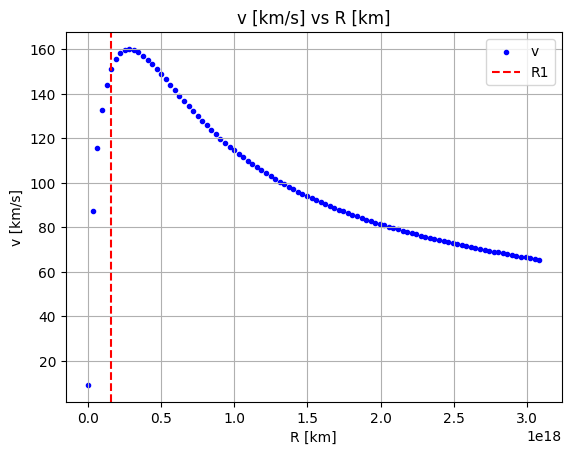

In [7]:
R = np.linspace(0.01*kpc_to_m,100*kpc_to_m,100)
vr_stars = []
for i in R:
  vr_stars.append(v_R_stars(i,M1,R1))
R2 = [i * 0.001 for i in R]
plt.scatter(x=R2,y=vr_stars, marker='.',c="blue",label="v")
#plt.xlim(-1,0.8)
#plt.ylim(-2,0)
plt.axvline(x=R1*0.001, color='red', linestyle='--', label="R1")
plt.xlabel("R [km]")
plt.ylabel("v [km/s]")
plt.title("v [km/s] vs R [km]")
plt.legend()
plt.grid()
plt.show()

\begin{equation}
v(R) = \sqrt{\frac{GM_1}{R}}
\end{equation}

Notamos que posee una forma asitotica disminuyendo la velocidad hasta llegar a 0.

En 1978, la astrónoma Vera Rubin descubrió que, para distancias grandes, la curva de rotación no seguía la forma predicha por los típicos perfiles de masa (como aquel que usted describió en la parte anterior).

Una forma de resolver este misterio es incorporando un segundo elemento que está aportando de forma considerable a la distribución de materia, pero que aparentemente no emite ni absorbe nada de luz, apodado como **materia oscura**.

En 1997, Julio Navarro, Carlos Frenk y Simon White publicaron [un artículo científico](https://iopscience.iop.org/article/10.1086/304888/pdf) en el cual proponían un perfil de densidad $\rho(r)$ para la materia oscura a partir de resultados de simulaciones numéricas. Este perfil de densidad permite obtener la masa encerrada en un radio $R$ de la forma:

\begin{equation}
\tag{4}
M_{dm}(R, M_0, R_0) = M_0 \times \left[\ln\left(\frac{R_0 + R}{R_0}\right)  + \frac{R_0}{R_0 + R} - 1\right]
\end{equation}

4. Añada al gráfico anterior la curva de rotación dada por perfil de la ecuación (4) considerando $M_0 = 5\times 10^{10} M_{\odot}$, y $R_0 = 20$ kpc, recuerde añadir una leyenda adecuada que permita identificar ambos perfiles.


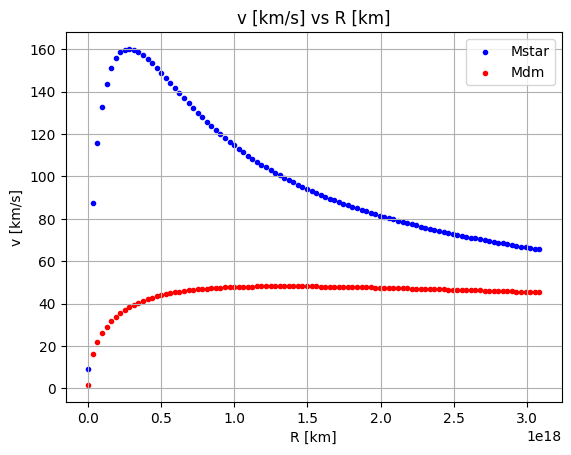

In [8]:
# Parta por definir la función M_dm(R, M0, R0) tal como se definió en la ec. (4)
M0=5e10*solar_masses_to_kg
R0=20*kpc_to_m
def M_dm(R, M0, R0):
  m=M0*(np.log((R0+R)/R0)+R0/(R0+R)-1)
  return(m)


# Cree la función v_R_dm(R, M0, R0) utilizando la ec. (4) en (1). v(R) debe tener unidades de km/s
def v_R_dm(R, M0, R0):
  u=np.sqrt(G*M_dm(R,M0,R0)/R)
  return(u*0.001)

# Utilice el mismo arreglo R de la parte anterior.
R = np.linspace(0.01*kpc_to_m,100*kpc_to_m,100)

# Repita el cálculo de v(R) pero para el perfil de la ecuación (4)
vr_stars = []
for i in R:
  vr_stars.append(v_R_stars(i,M1,R1))
# No olvide graficar ambas curvas de rotación y colocar una leyenda.

v_r_dm = []
for i in R:
  v_r_dm.append(v_R_dm(i,M0,R0))

# Gráfico:
R2 = [i * 0.001 for i in R]
plt.scatter(x=R2,y=vr_stars, marker='.',c="blue", label="Mstar")
plt.scatter(x=R2,y=v_r_dm, marker='.',c="red", label="Mdm")

plt.xlabel("R [km]")
plt.ylabel("v [km/s]")
plt.title("v [km/s] vs R [km]")
plt.legend()
plt.grid()
plt.show()

5. ¿Qué componente parece dominar a distancias cortas? ¿Cuál a distancias largas?

**Respuesta (corta):** La segunda curva (materia oscura) parece dominar a distancias cortas debido a que poseé menor variablidad alcanzando una meseta claramente, no así en la primera curva puesto que es mas inesestable pero a distancias largas tiene un valor al que tiende.

Es razonable pensar que uno necesita tanto el componente deducido por la masa estelar (o luminosa) como aquella que no interactúa con la luz (materia oscura), por lo que un perfil de masa más completo involucra una suma de cada componente tal como se describe en la siguiente ecuación:

\begin{equation}
\tag{5}
M_{tot}(R, M_0, R_0, M_1, R_1 ) =  M_{dm}(R,M_0, R_0) + M_{star}(R, M_1, R_1)
\end{equation}

Ahora analizaremos la curva de rotación de la [galaxía NGC 6503](https://es.wikipedia.org/wiki/NGC_6503), para ello cargaremos el archivo **velocity_curve_NGC6503.txt**.

Las columnas del archivo tienen la siguiente información, distancia del centro (en kpc), velocidad medida (en km/s) y el error estándar en la medición (en km/s).

In [6]:
# Partiremos por "montar" el drive, esto permite que podamos leer los archivos de nuestro drive
from google.colab import drive
drive.mount('/content/drive')    # se les debe abrir una pestaña extra pidiendo permisos

Mounted at /content/drive


In [9]:
# Encuentren la ruta de su archivo, para ello puede utilizar la barra de herramientas izquierda
# lleguen a su archivo desde su "drive" y con el click derecho "copiar ruta" y luego la pegan
# como un string en la siguiente variable.
path_archivo = '/content/drive/MyDrive/ASTRONOMIA/TAREA 3/velocity_curve_NGC6503.txt'
datos = np.loadtxt(path_archivo)

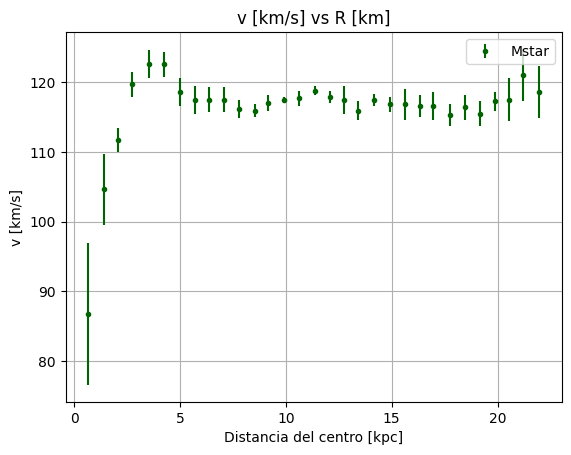

In [10]:
# Haga un gráfico de la curva de rotación incluyendo barras de error con plt.errorbar
# No olvide añadir todo lo esencial de un gráfico y que los errores se vean de forma clara.
# Para mejor claridad cuando comparemos con modelos, haga que los puntos NO estén conectados por alguna línea.
x1=[i[0] for i in datos]
y1=[i[1] for i in datos]
e1=[i[2] for i in datos]
plt.errorbar(x=x1,y=y1,yerr=e1, fmt='.',c="darkgreen", label="Mstar")
#plt.xlim(-1,0.8)
#plt.ylim(-2,0)
plt.xlabel("Distancia del centro [kpc]")
plt.ylabel("v [km/s]")
plt.title("v [km/s] vs R [km]")
plt.legend()
plt.grid()
plt.show()

Ajustaremos 3 modelos de curva de rotación para esta galaxia.

1. Solo componente estelar.
2. Solo materia oscura.
3. Componente estelar y materia oscura.

¿Es este un problema de ajuste de modelos lineal o no-lineal?

**Respuesta (una o dos palabras):** no lineal puesto que no hay clara conexion entre puntos

In [11]:
# Importamos curve_fit que se encargará de hacer el ajuste.
from scipy.optimize import curve_fit

In [14]:
R = np.linspace(0.01*kpc_to_m,100*kpc_to_m,100)
M0=5e10*solar_masses_to_kg
R0=20*kpc_to_m
M1=10e10*solar_masses_to_kg
R1=5*kpc_to_m
M0i=1e10*solar_masses_to_kg
M1i=1e11*solar_masses_to_kg
R0i=1*kpc_to_m
R1i=20*kpc_to_m
inic = [M0i, R0i, M1i, R1i]

In [23]:
# Funciones para los modelos
def M_star(R, M_1, R_1):
  m=M_1*(1-(np.exp(-R/R_1))*(R_1+R)/R_1)
  return(m)

def v_R_stars(R, M1, R1):
  v=np.sqrt(G*M_star(R,M1,R1)/R)
  return(v*0.001)

def M_dm(R, M0, R0):
  m=M0*(np.log((R0+R)/R0)+R0/(R0+R)-1)
  return(m)

def v_R_dm(R, M0, R0):
  u=np.sqrt(G*M_dm(R,M0,R0)/R)
  return(u*0.001)

def v_R_tot(R, M0, R0, M1, R1):
  R = np.clip(R, 1e-10, None)
  d=v_R_dm(R,M0,R0) + v_R_stars(R,M1,R1)
  return d

# Definir el array de radios (metros)
R = np.linspace(0.01 * kpc_to_m, 100 * kpc_to_m, 100)

# Parámetros iniciales para el ajuste
M0i = 1e10 * solar_masses_to_kg
R0i = 1 * kpc_to_m
M1i = 1e11 * solar_masses_to_kg
R1i = 20 * kpc_to_m
inic = [M0i, R0i, M1i, R1i]

v_data3 = v_R_tot(R, 5e10 * solar_masses_to_kg, 20 * kpc_to_m, 10e10 * solar_masses_to_kg, 5 * kpc_to_m)
v_data1 = v_R_stars(R, 10e10 * solar_masses_to_kg, 5 * kpc_to_m)
v_data2 = v_R_dm(R, 5e10 * solar_masses_to_kg, 20 * kpc_to_m)

# Ajuste de modelos
popt_tot, pcov_tot = curve_fit(v_R_tot, R, v_data3, p0=inic)
popt_stars, pcov_stars = curve_fit(v_R_stars, R, v_data1, p0=[M1i, R1i])
popt_dm, pcov_dm = curve_fit(v_R_dm, R, v_data2, p0=[M0i, R0i])

# Parámetros ajustados
M0_opt_tot, R0_opt_tot, M1_opt_tot, R1_opt_tot = popt_tot
M1_opt_stars, R1_opt_stars = popt_stars
M0_opt_dm, R0_opt_dm = popt_dm



print(f'Parametros óptimos Stars+DM: M0={M0_opt_tot}, R0={R0_opt_tot}, M1={M1_opt_tot}, R1={R1_opt_tot}')
print(f'Parametros óptimos Stars: M1={M1_opt_stars}, R1={R1_opt_stars}')
print(f'Parametros óptimos DM: M0={M0_opt_dm}, R0={R0_opt_dm}')

v_R_tot_opt = v_R_tot(R, M0_opt_tot, R0_opt_tot, M1_opt_tot, R1_opt_tot)
v_R_stars_opt = v_R_stars(R, M1_opt_stars, R1_opt_stars)
v_R_dm_opt = v_R_dm(R, M0_opt_dm, R0_opt_dm)


Parametros óptimos Stars+DM: M0=9.94499999999651e+40, R0=6.171999999978693e+20, M1=1.9889999999970117e+41, R1=1.5429999999994577e+20
Parametros óptimos Stars: M1=1.9890000000000086e+41, R1=1.5430000000000288e+20
Parametros óptimos DM: M0=9.944999999999987e+40, R0=6.171999999999993e+20


<ipython-input-23-51c1c7446b63>:7: RuntimeWarning: invalid value encountered in sqrt
  v=np.sqrt(G*M_star(R,M1,R1)/R)


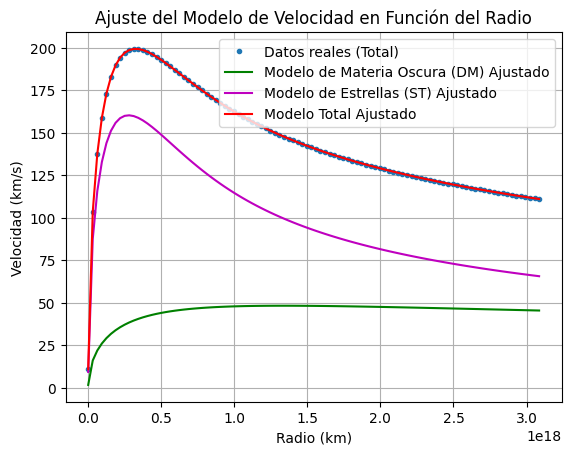

In [24]:
# En el gráfico de los datos, añada los 3 modelos con los parámetros óptimos encontrados en la parte anterior.
# No olvide añadir una leyenda adecuada.
plt.plot(R / 1000, v_data3, '.', label='Datos reales (Total)')
plt.plot(R / 1000, v_R_dm_opt, 'g', label='Modelo de Materia Oscura (DM) Ajustado')
plt.plot(R / 1000, v_R_stars_opt, 'm', label='Modelo de Estrellas (ST) Ajustado')
plt.plot(R / 1000, v_R_tot_opt, 'r', label='Modelo Total Ajustado')
plt.xlabel('Radio (km)')
plt.ylabel('Velocidad (km/s)')
plt.legend()
plt.title('Ajuste del Modelo de Velocidad en Función del Radio')
plt.grid(True)
plt.show()

Evaluaremos cada modelo con la métrica $\chi ^2$ definida como:

$$\chi ^2 = \sum_{i=1}^N \frac{(y_i - v_R(x_i))^2}{\sigma_i^2}, $$

donde $y_i$ es el dato de la velocidad de rotación en la distancia $x_i$, cuyo error de medición es $\sigma_i$ y $v_R$ es el modelo respectivo.


In [25]:
# Para evaluar las métricas necesita primero evaluar su modelo en cada x_i
pred_tot = v_R_tot(R, M0_opt_tot, R0_opt_tot, M1_opt_tot, R1_opt_tot)
pred_dm = v_R_dm(R,M1_opt_tot, R1_opt_tot)
pred_stars = v_R_stars(R,  M0_opt_tot, R0_opt_tot)

# Defina la función chi_cuadrado(datos, sigma, pred), donde datos, sigma y pred
# son arreglos de igual largo que contienen los datos y_i, los errores sigma_i y
# la predicción de algún modelo.
# Esto se puede hacer en 1 línea con arreglos de numpy :)

def chi_cuadrado(datos, sigma, pred):
    return np.sum(((datos-pred)/sigma)**2)


errors3 = np.std(v_data3) #se calcula el error como la desviacion estandar
errors1 = np.std(v_data1)
errors2 = np.std(v_data2)

# Haga un print reportando el chi-cuadrado de cada modelo. Rellene según corresponda.

print('Chi-cuadrado (dm+stars): ', chi_cuadrado(v_data3, errors3, pred_tot))
print('Chi-cuadrado (dm-only): ', chi_cuadrado(v_data2, errors2, pred_dm))
print('Chi-cuadrado (stars-only): ', chi_cuadrado(v_data1, errors1, pred_stars))



Chi-cuadrado (dm+stars):  1.5060109130489095e-24
Chi-cuadrado (dm-only):  10004.695540085888
Chi-cuadrado (stars-only):  368.7721071824007


**Responda:**
1. ¿Qué modelo ajusta mejor los datos bajo la métrica anterior? ¿El peor?
**Respuesta:** el modelo que mejor se ajusta corresponde al conjunto de los modelos de materia oscura y estrellas y la que peor se ajusta corresponde al modelo de estrellas.
2. ¿Qué puede concluír de los constituyentes de la galaxia NGC6503?
**Respuesta:** Se puede concluir que la combinación de los modelos de materia oscura y estrellas se ajusta bien a los datos de la galaxia NGC 6503, mientras que los modelos por si solo no logran obtener un buen ajuste.






## **¿Cuántos parámetros utilizo?**

En el problema anterior el modelo que utilizamos tenía una motivación física, no estaba escogido "al azar". En esta parte trataremos de modelar algo del cual no tenemos una motivación física para proponer un modelo, en estos casos siempre debe primar el utilizar modelos sencillos por sobre modelos de alta complejidad o con muchos parámetros. En particular, ajustaremos polinomios de distinto grado y determinaremos el grado óptimo del modelo tal que su capacidad predictiva no se vea alterada.

Partiremos por generar los datos.

Considere la siguiente función:

$$f(x) = 5\sin(x) + 5\cos(x^2) + 3$$

Le añadiremos ruido utilizando una distribución normal $N(\mu= 0, \sigma=2)$.

In [26]:
np.random.seed(123)  # investigue que hace esta línea de código

**Responda:** La línea de codigo "np.random.seed(123)" establece una semilla para el generador de números aleatorios, asegurando que siempre se obtengan los mismos resultados por cada ejecución del código. La importancia de utilizar una semilla  es para que los experimentos y pruebas sean reproducibles y consistentes.
- ¿Qué hace la línea de código anterior? ¿Por qué es una buena práctica utilizar una "semilla" cuando se realizan experimentos aleatorios?

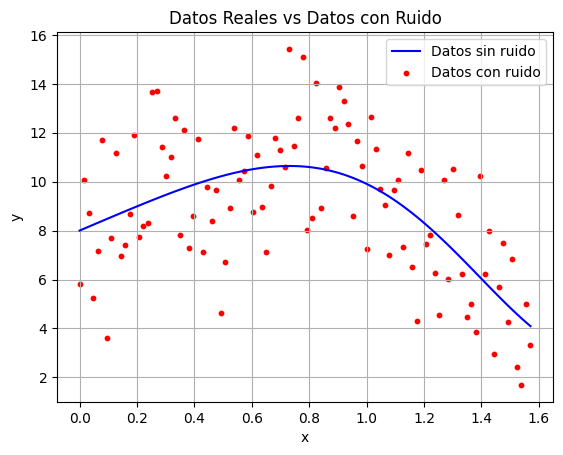

In [27]:
N_data = 100
x = np.linspace(0,np.pi/2, N_data)

# Calcule un arreglo con los valores de la función f(x) con el arreglo antes definido
y_real =5*np.sin(x)+5*np.cos(x**2)+3

# Ahora sume el "ruido" aleatorio. Para ello utilice np.random.normal()
# Revise la documentación y utilice una desviación estándar igual a 2

desv = 2
ruido = np.random.normal(0, desv, N_data)

y_ruido = y_real + ruido

# Visualice sus datos :)

plt.plot(x, y_real, label='Datos sin ruido', color='blue')

plt.scatter(x, y_ruido, label='Datos con ruido', color='red', s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos Reales vs Datos con Ruido')
plt.legend()
plt.grid()

# Puede graficar la función sin ruido si así lo desea. (opcional)


Ahora, de forma similar a lo visto en clases, haremos un ajuste con modelos polinomiales y, utilizando cross-validation, determinaremos el grado del polinomio óptimo a modo de favorecer la capacidad predictiva del modelo.

In [28]:
# Importamos los esenciales :)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [29]:
# En la siguiente variable guardaremos el error asociado a los modelos
# Exploraremos polinomios de grado 1 hasta 10, cada fila estará asociada a un modelo
# distinto y las columnas a alguna iteración de cross-validation

N_iteraciones  = 100 # puede cambiar este valor si lo desea
errores_modelos = np.zeros((10, N_iteraciones))

Ahora, repita el siguiente experimento para realizar cross-validation. Para cada iteración debe hacer lo siguiente:

- Divida el dataset en entrenamiento y testeo (use una proporción adecuada). Utilice la función train_test_split!
- Con el set de entrenamiento ajuste el modelo polinomial (desde el grado 1 al 10). Puede utilizar PolynomialFeatures para generar la matriz de diseño que necesite, use include_bias=True.  
- Evalúe su modelo en los datos de testeo y utilice las predicciones para evaluar el mean_squared_error.
- Guarde el MSE en la matriz de errores.

In [30]:
x = np.linspace(0,np.pi/2, N_data)
y_real =5*np.sin(x)+5*np.cos(x**2)+3
for i in range(100):
  # Rellene según corresponda
    X_train, X_test, y_train, y_test = train_test_split(x[:, np.newaxis], y_real, test_size=0.3, random_state=i)
    for j in range(10):
      u=j+1
      poly = PolynomialFeatures(u, include_bias=True)
      X_train_poly = poly.fit_transform(X_train)
      X_test_poly = poly.transform(X_test)
      model = LinearRegression()
      model.fit(X_train_poly, y_train)
      y_pred = model.predict(X_test_poly)
      error = mean_squared_error(y_test, y_pred)
      errores_modelos[j, i] = error
      # Aquí puede iterar para cada modelo o grado del polinomio :) (cuidado que j parte siendo 0)

Finalmente, grafique el MSE promedio de las N iteraciones, para cada modelo y decida cuál es el grado óptimo del polinomio que debería utilizar para su modelo.

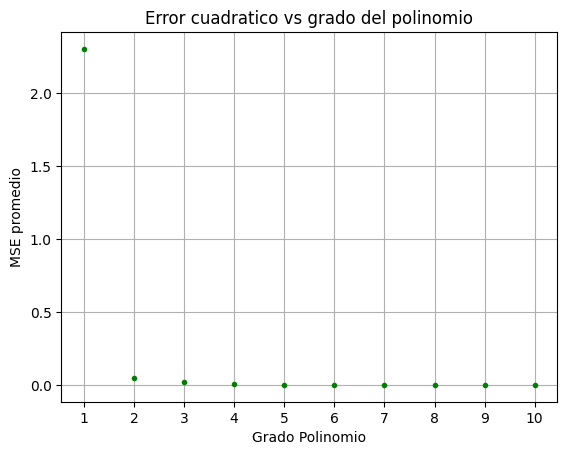

In [32]:
# Note que para calcular el promedio pedido puede utilizar np.mean(errores_modelos, axis=1) ¿qué hace el parámetro axis=1?
# Añada su gráfico.
mse_promedio = np.mean(errores_modelos, axis=1)#calcula la media a lo largo del eje 1

plt.plot(range(1,11), mse_promedio, '.',c="g")
plt.xlabel('Grado Polinomio')
plt.ylabel('MSE promedio')
plt.title('Error cuadratico vs grado del polinomio')
plt.grid()
plt.xticks(range(1, 11))
plt.show()



In [33]:
mse_promedio

array([2.30579343e+00, 4.49966500e-02, 2.03328764e-02, 3.27626008e-03,
       4.37541639e-05, 3.85538042e-06, 9.33398280e-07, 2.90707052e-08,
       6.99899576e-11, 1.01922365e-10])

El grado óptimo del polinomio es 9 debido a que presenta menor error medio.